In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

In [2]:
root_path = 'C:/Users/Александр/Projects/projects/Top_buy/data/'

In [18]:
df_list = []

for date in os.listdir(root_path):
    for name in os.listdir(root_path + date):
        if name.startswith('.'):
            continue
        file_path = f'{root_path}{date}/{name}/data.csv'
        t_df = pd.read_csv(file_path, sep = ',', index_col = 0)
        t_df['name'], t_df['date'] = name, date
        df_list.append(t_df)
df = pd.concat(df_list).reset_index().drop('index', 1)

C:\Users\Александр\AppData\Local\Temp\ipykernel_7240\37866620.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = pd.concat(df_list).reset_index().drop('index', 1)


In [20]:
df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


Выясните, какой пользователь купил больше всего товаров.

In [28]:
quantity_sum = df.groupby('name', as_index=False) \
                 .agg({'quantity':'sum'}) \
                 .sort_values('quantity', ascending=False)
quantity_sum.head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

In [32]:
top10_products = df.groupby('product_id', as_index=False) \
                   .agg({'quantity' : 'sum'}) \
                   .sort_values('quantity', ascending=False) \
                   .head(10)
top10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


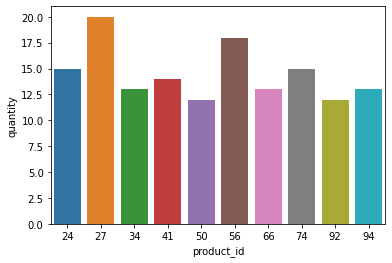

In [33]:
ax = sns.barplot(x='product_id', y='quantity', data=top10_products)

Укажите, сколько было продано единиц товара с product_id равным 56

In [34]:
top10_products.query('product_id == 56')

,product_id,quantity
42,56,18


Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [35]:
quantity_by_date = df.groupby('date', as_index=False) \
                     .agg({'quantity' : 'sum'}) \
                     .sort_values('quantity', ascending=False) 

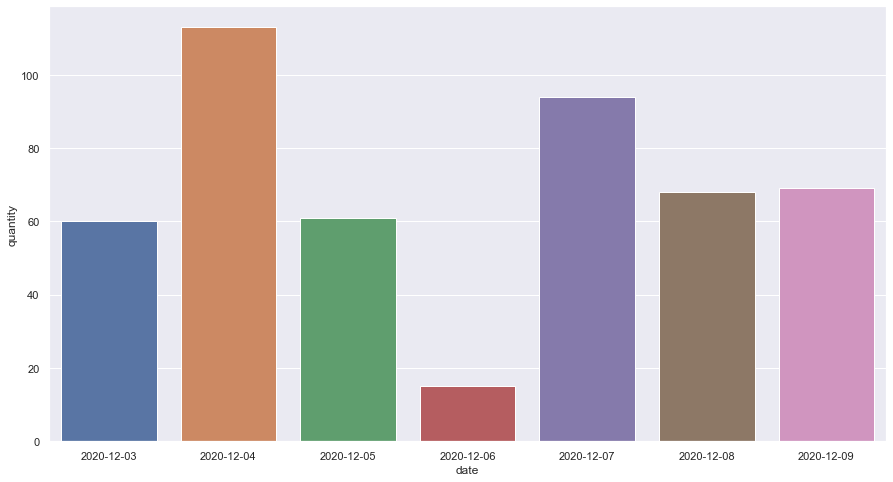

In [37]:
ax = sns.barplot(x='date', y='quantity',order=['2020-12-03','2020-12-04', '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09'], data=quantity_by_date)
sns.set(rc = {'figure.figsize':(16,8)})

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [38]:
df_dup = df.drop_duplicates(subset=['name', 'date', 'product_id'])

In [39]:
df_dup.groupby(['product_id','name'], as_index=False) \
      .agg({'product_id':'count'}) \
      .query('product_id > 1')

,name,product_id
24,Anton_Ivanov,2
150,Petr_Fedorov,2
